In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 获取张量的阶（从下面例子看到tf的计算过程）
g = tf.Graph()
# 定义一个计算图
with g.as_default():
    ## 定义张量t1,t2,t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])

    ## 获取张量的阶
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)

    ## 获取他们的shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print("shapes:", s1, s2, s3)
# 启动前面定义的图来进行下一步操作
with tf.Session(graph=g) as sess:
    print("Ranks:", r1.eval(), r2.eval(), r3.eval())

shapes: () (4,) (2, 2)
Ranks: 0 1 2


In [3]:
# 初始化一个空的计算图
g = tf.Graph()

# 为该计算图加入节点（张量和操作）
with g.as_default():
    a = tf.constant(1,name="a")
    b = tf.constant(2,name="b")
    c = tf.constant(3,name="c")
    
    z = 2*(a-b)+c
    
# 执行计算图
## 通过调用tf.Session产生会话对象，该调用可以接受一个图为参数（这里是g），否则将启动默认的空图
## 执行张量操作的用sess.run(),他将返回大小均匀的列表
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c =>',sess.run(z))

2*(a-b)+c => 1


In [4]:
g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(tf.int32,shape=(),name="tf_a")  # shape=[]就是定义0阶张量,更高阶张量可以用【n1,n2,n3】表示，如shape=（3,4,5）
    tf_b = tf.placeholder(tf.int32,shape=(),name="tf_b")
    tf_c = tf.placeholder(tf.int32,shape=(),name="tf_c")
    
    r1 = tf_a - tf_b
    r2 = 2*r1
    z = r2 + tf_c
with tf.Session(graph=g) as sess:
    feed = {
        tf_a:1,
        tf_b:2,
        tf_c:3
    }
    
    print('z:',sess.run(z,feed_dict=feed))

z: 1


In [5]:

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32,shape=(None,2),name="tf_x")
    x_mean = tf.reduce_mean(tf_x,axis=0,name="mean")
    
np.random.seed(123)
with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0,high=1,size=(5,2))
    print("Feeding data with shape",x1.shape)
    print("Result:",sess.run(x_mean,feed_dict={tf_x:x1}))
    
    x2 = np.random.uniform(low=0,high=1,size=(10,2))
    print("Feeding data with shape",x2.shape)
    print("Result:",sess.run(x_mean,feed_dict={tf_x:x2}))

Feeding data with shape (5, 2)
Result: [0.6208972  0.46750155]
Feeding data with shape (10, 2)
Result: [0.46306401 0.48766556]


In [6]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1,2,3,4],[5,6,7,8]]),name="w")
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int32_ref>


In [7]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [14]:
# 我们来比较定义变量与初始化顺序的关系
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1,name="w1")
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2,name="w2")
    
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print("w1:",sess.run(w1))
# with tf.Session(graph=g2) as sess:    
#     sess.run(init_op)
#     print("w2:",sess.run(w2))

w1: 1


In [15]:

g = tf.Graph()

with g.as_default():
    with tf.variable_scope("net_A"):   #定义一个域net_A
        with tf.variable_scope("layer-1"): # 在域net_A下再定义一个域layer-1
            w1 = tf.Variable(tf.random_normal(shape=(10,4)),name="weights")   # 该变量定义在net_A/layer-1域下
        with tf.variable_scope("layer-2"):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)),name="weights")
    with tf.variable_scope("net_B"):   # 定义一个域net_B
        with tf.variable_scope("layer-2"):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)),name="weights")
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-2/weights:0' shape=(10, 4) dtype=float32_ref>


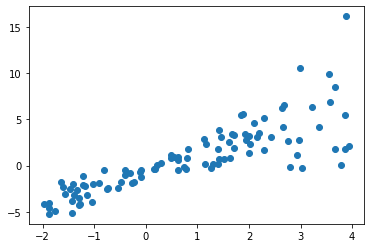

In [16]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = tf.Graph()

# 定义计算图
with g.as_default():
    tf.set_random_seed(123)
    
    ## placeholder
    tf_x = tf.placeholder(shape=(None),dtype=tf.float32,name="tf_x")
    tf_y = tf.placeholder(shape=(None),dtype=tf.float32,name="tf_y")
    
    ## define the variable (model parameters)
    weight = tf.Variable(tf.random_normal(shape=(1,1),stddev=0.25),name="weight")
    bias = tf.Variable(0.0,name="bias")
    
    ## build the model
    y_hat = tf.add(weight*tf_x,bias,name="y_hat")
    
    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y-y_hat),name="cost")
    
    ## train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost,name="train_op")
# 创建会话启动计算图并训练模型
## create a random toy dataset for regression
np.random.seed(0)
def make_random_data():
    x = np.random.uniform(low=-2,high=4,size=100)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0,scale=(0.5 + t*t/3),size=None)
        y.append(r)
    return x,1.726*x-0.84+np.array(y)

x,y = make_random_data()

plt.plot(x,y,'o')
plt.show()

Epoch    0: 17.0139
Epoch   50: 10.4458
Epoch  100: 7.4019
Epoch  150: 5.9672
Epoch  200: 5.2706
Epoch  250: 4.9156
Epoch  300: 4.7212
Epoch  350: 4.6044
Epoch  400: 4.5269
Epoch  450: 4.4707


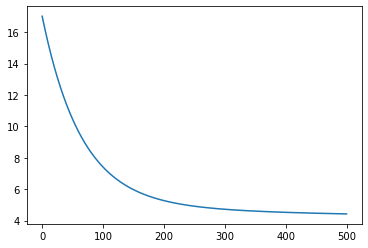

In [17]:
## train/test splits
x_train,y_train = x[:100],y[:100]
x_test,y_test = x[100:],y[100:]

n_epochs = 500
train_costs  = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c,_ = sess.run([cost,train_op],feed_dict={tf_x:x_train,tf_y:y_train})
        train_costs.append(c)
        if not e % 50:
            print("Epoch %4d: %.4f"%(e,c))
plt.plot(train_costs)
plt.show()

In [18]:

## train/test splits
x_train,y_train = x[:100],y[:100]
x_test,y_test = x[100:],y[100:]

n_epochs = 500
train_costs  = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c,_ = sess.run(['cost:0','train_op'],feed_dict={'tf_x:0':x_train,'tf_y:0':y_train})
        train_costs.append(c)
        if not e % 50:
            print("Epoch %4d: %.4f"%(e,c))

Epoch    0: 17.0139
Epoch   50: 10.4458
Epoch  100: 7.4019
Epoch  150: 5.9672
Epoch  200: 5.2706
Epoch  250: 4.9156
Epoch  300: 4.7212
Epoch  350: 4.6044
Epoch  400: 4.5269
Epoch  450: 4.4707


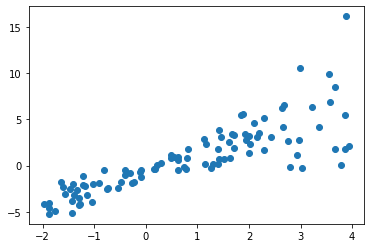

Epoch    0: 17.0139
Epoch   50: 10.4458
Epoch  100: 7.4019
Epoch  150: 5.9672
Epoch  200: 5.2706
Epoch  250: 4.9156
Epoch  300: 4.7212
Epoch  350: 4.6044
Epoch  400: 4.5269
Epoch  450: 4.4707


In [20]:
g = tf.Graph()

# 定义计算图
with g.as_default():
    tf.set_random_seed(123)
    
    ## placeholder
    tf_x = tf.placeholder(shape=(None),dtype=tf.float32,name="tf_x")
    tf_y = tf.placeholder(shape=(None),dtype=tf.float32,name="tf_y")
    
    ## define the variable (model parameters)
    weight = tf.Variable(tf.random_normal(shape=(1,1),stddev=0.25),name="weight")
    bias = tf.Variable(0.0,name="bias")
    
    ## build the model
    y_hat = tf.add(weight*tf_x,bias,name="y_hat")
    
    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y-y_hat),name="cost")
    
    ## train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost,name="train_op")
    saver = tf.train.Saver()
# 创建会话启动计算图并训练模型
## create a random toy dataset for regression
np.random.seed(0)
def make_random_data():
    x = np.random.uniform(low=-2,high=4,size=100)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0,scale=(0.5 + t*t/3),size=None)
        y.append(r)
    return x,1.726*x-0.84+np.array(y)

x,y = make_random_data()

plt.plot(x,y,'o')
plt.show()

## train/test splits
x_train,y_train = x[:100],y[:100]
x_test,y_test = x[100:],y[100:]

n_epochs = 500
train_costs  = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c,_ = sess.run(['cost:0','train_op'],feed_dict={'tf_x:0':x_train,'tf_y:0':y_train})
        train_costs.append(c)
        if not e % 50:
            print("Epoch %4d: %.4f"%(e,c))
    saver.save(sess,'trained-model/')

In [21]:

# 加载保存的模型g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("trained-model/.meta")
    new_saver.restore(sess,'trained-model/')
    y_pred = sess.run('y_hat:0',feed_dict={'tf_x:0':x_test})

INFO:tensorflow:Restoring parameters from trained-model/


INFO:tensorflow:Restoring parameters from trained-model/


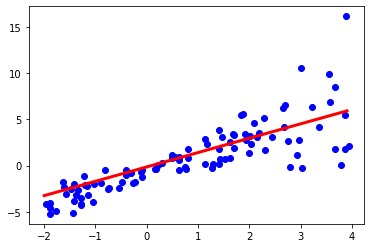

In [23]:
## 可视化模型
x_arr = np.arange(-2,4,0.1)
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("trained-model/.meta")
    new_saver.restore(sess,'trained-model/')
    y_arr = sess.run('y_hat:0',feed_dict={'tf_x:0':x_arr})
    plt.figure()
    plt.plot(x_train,y_train,'bo')
    plt.plot(x_test,y_test,'bo',alpha=0.3)
    plt.plot(x_arr,y_arr.T[:,0],'-r',lw=3)
    plt.show()

In [24]:

g = tf.Graph()

with g.as_default():
    arr = np.array([[1.,2.,3.,3.5],[4.,5.,6.,6.5],[7.,8.,9.,9.5]])
    T1 = tf.constant(arr,name="T1")
    print(T1)
    s = T1.get_shape()
    print("Shape of T1 is ",s)
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is  (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [25]:
with g.as_default():
    T4 = tf.reshape(T1,shape=[1,1,-1],name="T4")
    print(T4)
    T5 = tf.reshape(T1,shape=[1,3,-1],name="T5")
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [26]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [27]:

with g.as_default():
    tf_splt = tf.split(T5,num_or_size_splits=2,axis=2,name="T8")
    print(tf_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [28]:

g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=(5,1),dtype=tf.float32,name="t1")
    t2 = tf.zeros(shape=(5,1),dtype=tf.float32,name="t2")
    print(t1)
    print(t2)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)


In [29]:

with g.as_default():
    t3 = tf.concat([t1,t2],axis=0,name="t3")
    print(t3)
    t4 = tf.concat([t1,t2],axis=1,name="t4")
    print(t4)

Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [30]:
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [32]:

with tf.Session(graph=g) as sess:   
    print(sess.run(t3))
    print()
    print(sess.run(t4))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [34]:

x,y = 1.0,2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32,shape=None,name="tf_x")
    tf_y = tf.placeholder(dtype=tf.float32,shape=None,name="tf_y")
    res = tf.cond(tf_x<tf_y,lambda: tf.add(tf_x,tf_y,name="result_add"),lambda: tf.subtract(tf_x,tf_y,name="result_sub"))
    print("Object:",res)  #对象被命名为"cond/Merge:0"
    
with tf.Session(graph=g) as sess:
    print("x<y: %s -> Result:"%(x<y),res.eval(feed_dict={"tf_x:0":x,"tf_y:0":y}))
    x,y = 2.0,1.0
    print("x<y: %s -> Result:"%(x<y),res.eval(feed_dict={"tf_x:0":x,"tf_y:0":y}))

Object: Tensor("cond/Merge:0", dtype=float32)
x<y: True -> Result: 3.0
x<y: False -> Result: 1.0


In [35]:

f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x,y),f1)],default=f2)
print(result)

Tensor("case/cond/Merge:0", shape=(), dtype=int32)


In [36]:
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i,100)
b = lambda i: tf.add(i,1)
r = tf.while_loop(cond=c,body=b,loop_vars=[i])
print(r)

Tensor("while/Exit:0", shape=(), dtype=int32)


In [38]:
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name='weights',
                              shape=(data_shape[1], n_classes),
                              dtype=tf.float32)
    bias = tf.get_variable(name='bias',
                           initializer=tf.zeros(shape=n_classes))
    print(weights)
    print(bias)
    logits = tf.add(tf.matmul(data, weights),
                    bias,
                    name='logits')
    print(logits)
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(
        tf.random_normal(shape=(data_shape[1],
                                n_hidden)),
        name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden),
                     name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1,
                    name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
        
    w2 = tf.Variable(
        tf.random_normal(shape=(n_hidden,
                                data_shape[1])),
        name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]),
                     name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2,
                    name = 'output')
    return output, tf.nn.sigmoid(output)

batch_size=64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                          dtype=tf.float32,
                          name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X,
                                   n_hidden=50)
    
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X,
                                    labels=tf.ones(
                                        shape=batch_size))
        
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))
        
        init_op = tf.global_variables_initializer()

<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32_ref>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32_ref>
Tensor("classifier/logits:0", shape=(64, 2), dtype=float32)
<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32_ref>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32_ref>
Tensor("classifier/logits_1:0", shape=(64, 2), dtype=float32)


In [39]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter(logdir="trained-model/logs/",graph=g)